In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [46]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]
df

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 0
0,Edgerrin James,ARI,2006.0,N,4.0,30000000.0,7.500000e+06,102000000.0,0.073529,16.0,...,0.206897,1.142250e+07,4.569000e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Warrick Dunn,ATL,2006.0,N,3.0,12450000.0,4.150000e+06,102000000.0,0.040686,16.0,...,0.166667,6.320450e+06,1.896135e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jamal Lewis,BAL,2006.0,N,3.0,26000000.0,8.666667e+06,102000000.0,0.084967,17.0,...,0.281250,1.319933e+07,3.959800e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Willis McGahee,BUF,2006.0,Y,5.0,7053000.0,1.410600e+06,102000000.0,0.013829,14.0,...,0.214286,2.148344e+06,1.074172e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Deshaun Foster,CAR,2006.0,N,3.0,14500000.0,4.833333e+06,102000000.0,0.047386,14.0,...,0.115385,7.361167e+06,2.208350e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Christian McCaffrey,SF,2022.0,N,4.0,64063500.0,1.601588e+07,206082457.0,0.077716,14.0,...,0.260000,1.680065e+07,6.720261e+07,216180497.4,NaN,NaN,NaN,NaN,NaN,NaN
28,Kenneth Walker III,SEA,2022.0,Y,4.0,8441581.0,2.110395e+06,215796566.0,0.009780,16.0,...,0.238095,2.213805e+06,8.855218e+06,226370597.7,NaN,NaN,NaN,NaN,NaN,NaN
29,Leonard Fournette,TB,2022.0,N,3.0,21000000.0,7.000000e+06,202960773.0,0.034489,17.0,...,0.193548,7.343000e+06,2.202900e+07,212905850.9,NaN,NaN,NaN,NaN,NaN,NaN
30,Derrick Henry,TEN,2022.0,N,4.0,50000000.0,1.250000e+07,209793874.0,0.059582,16.0,...,0.406250,1.311250e+07,5.245000e+07,220073773.8,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
vets = df[df["Rookie Contract (Y/N)"] == "N"]
vets = vets[vets["Games Played"] > 8]
rooks = df[df["Rookie Contract (Y/N)"] == "N"]
rooks = rooks[rooks["Games Played"] > 8]

In [48]:
players = df.value_counts("Player Name")
players_1 = players[players > 1]
len(players_1)
#for name, count in players_greater_than_one.items():
#    print(f"Player: {name}, Count: {count}")

113

In [49]:
rush = df.groupby('Year')['Player Percentage of Rushing Yards'].mean()
result = rush
if 2008 in result.index and 2022 in result.index:
    initial_value = result.loc[2006]
    final_value = result.loc[2020]

    # Check if the initial value is not 0
    if initial_value != 0:
        # Calculate the percentage increase
        percentage_increase = ((final_value - initial_value) / initial_value) * 100
        print(f'Percentage increase from 2006 to 2022: {percentage_increase:.2f}%')
    else:
        print("Initial value is 0. Cannot calculate percentage increase.")
else:
    print("One or both of the specified years are not present in the result.")

Percentage increase from 2006 to 2022: -23.61%


In [50]:
rush

Year
2006.0    0.634448
2007.0    0.616418
2008.0    0.558477
2009.0    0.558223
2010.0    0.565577
2011.0    0.544508
2012.0    0.564847
2013.0    0.529496
2014.0    0.513575
2015.0    0.510926
2016.0    0.531970
2017.0    0.522176
2018.0    0.518207
2019.0    0.553349
2020.0    0.484675
2021.0    0.458771
2022.0    0.510990
Name: Player Percentage of Rushing Yards, dtype: float64

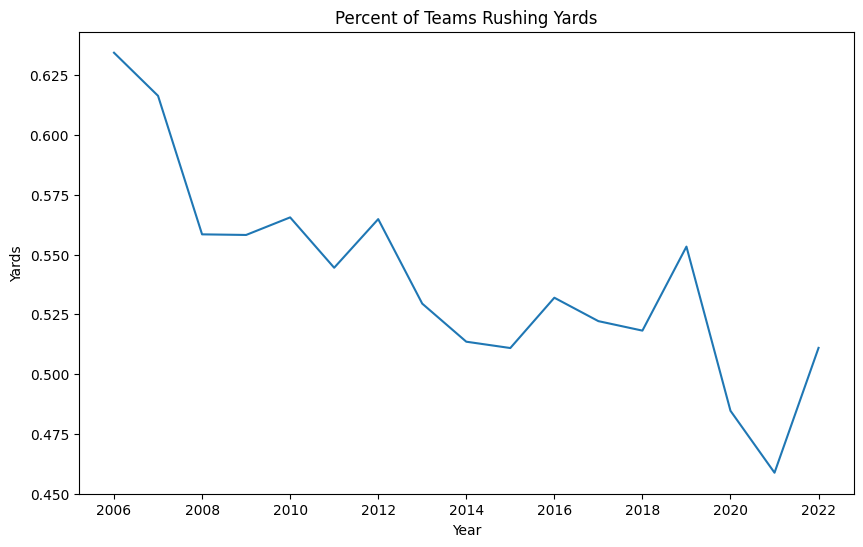

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(rush)
#plt.plot(rush['Year'], rush['Player Percentage of Rushing Yards'], marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Yards')
#plt.legend()
plt.title('Percent of Teams Rushing Yards')

plt.show()

In [52]:
team = df.groupby('Year')['Team Rushing Yards'].mean().reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


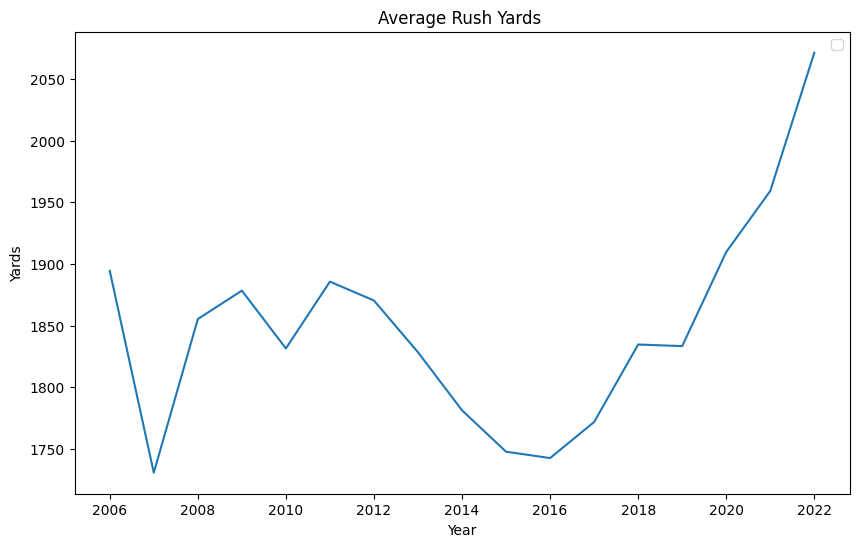

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(team['Year'], team['Team Rushing Yards'])
#plt.plot(rush['Year'], rush['Player Percentage of Rushing Yards'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yards')
plt.legend()
plt.title('Average Rush Yards ')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Year
2006.0    0.282565
2007.0    0.260775
2008.0    0.246116
2009.0    0.252206
2010.0    0.253992
2011.0    0.241238
2012.0    0.238184
2013.0    0.223920
2014.0    0.213998
2015.0    0.198426
2016.0    0.219534
2017.0    0.225011
2018.0    0.220762
2019.0    0.239515
2020.0    0.203833
2021.0    0.202638
2022.0    0.228932
Name: Player Percentage of Offensive Yards, dtype: float64

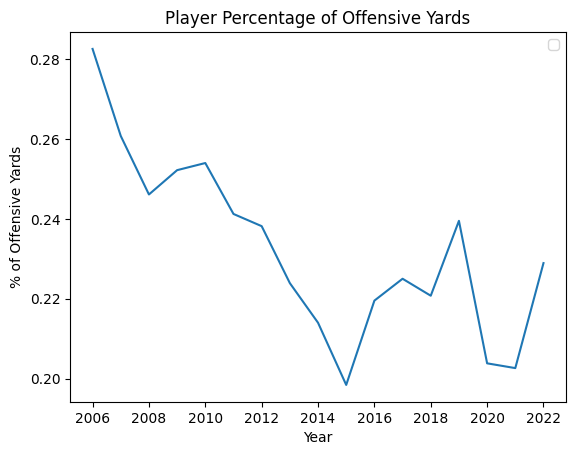

In [54]:
#temp = df.groupby('Year')['All-Purpose Yards'].mean()
#temp = df.groupby('Year')['Rush Yards'].mean()
#temp = df.groupby('Year')['Recieving Yards'].mean()
#temp = df.groupby('Year')['Receiving TDs'].mean()
temp = df.groupby('Year')['Player Percentage of Offensive Yards'].mean() #this one
#temp = df.groupby('Year')['Player Percentage of Touchdowns'].mean()
#temp = df.groupby('Year')['Player Percentage of Rushing Yards'].mean() #this one
plt.xlabel('Year')
plt.ylabel('% of Offensive Yards')
plt.legend()
plt.title('Player Percentage of Offensive Yards')
plt.plot(temp)
temp

In [55]:
df['back_perc'] = df['Backfield Snaps'] / df['Snaps Played']

b_snaps = df.groupby('Year')['back_perc'].mean() 


Text(0.5, 1.0, 'Player Percentage of Backfield Snaps')

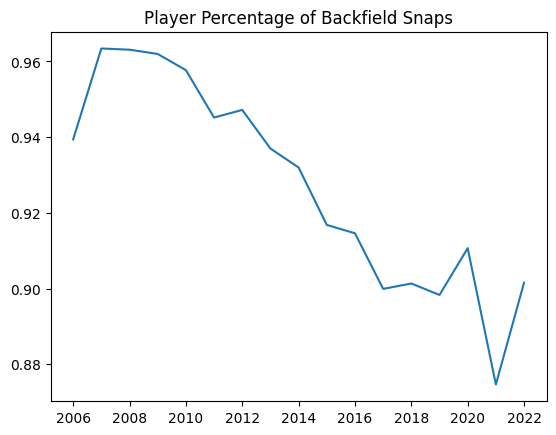

In [56]:
plt.plot(b_snaps)
plt.title('Player Percentage of Backfield Snaps')


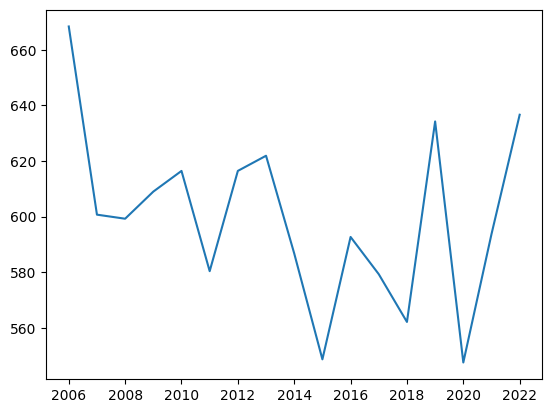

In [76]:
snaps = df.groupby('Year')['Snaps Played'].mean() 
plt.plot(snaps)

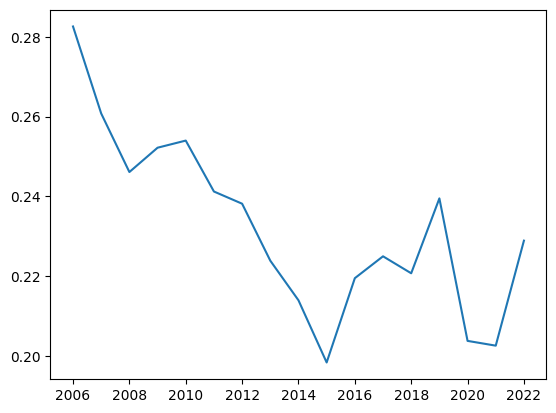

In [66]:
oy = df.groupby('Year')['Player Percentage of Offensive Yards'].mean() #this one
aav = df.groupby('Year')['AAV Adjusted'].mean() #this one

plt.plot(oy)


In [75]:

tpo = df.groupby('Year')['Total Pressure Oppurtnuties (OPP)'].mean() 
tpo

Year
2006.0    98.451613
2007.0    80.500000
2008.0    74.187500
2009.0    78.612903
2010.0    81.187500
2011.0    78.032258
2012.0    86.032258
2013.0    82.966667
2014.0    67.750000
2015.0    56.064516
2016.0    59.343750
2017.0    50.866667
2018.0    45.806452
2019.0    56.333333
2020.0    47.129032
2021.0    49.468750
2022.0    54.193548
Name: Total Pressure Oppurtnuties (OPP), dtype: float64

Text(0.5, 1.0, 'Trend in Pressure Oppurtunities (2006 - 2022)')

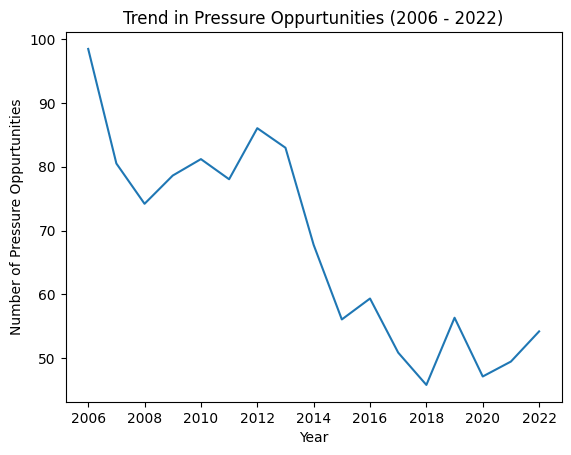

In [68]:
plt.plot(tpo)
plt.xlabel('Year')
plt.ylabel('Number of Pressure Oppurtunities')
plt.title('Trend in Pressure Oppurtunities (2006 - 2022)')

Text(0.5, 1.0, 'Percentage of Plays where Pressure was allowed (2006 - 2022)')

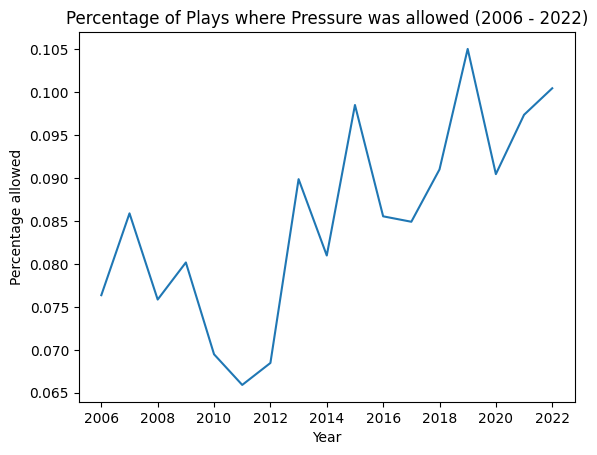

In [74]:
df['PR/OPP'] = df['QB Pressure Allowed (PR)'] / df['Total Pressure Oppurtnuties (OPP)']
proop = df.groupby('Year')['PR/OPP'].mean() 
plt.plot(proop)
plt.xlabel('Year')
plt.ylabel('Percentage allowed')
plt.title('Percentage of Plays where Pressure was allowed (2006 - 2022)')